<a href="https://colab.research.google.com/github/riffAt2013/FastAImodded/blob/master/fastAI_lesson2SGD_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this is the most common step that is used here in this notebook enivironment
# it imports some important module for fastai and enables inline matplotlib while visualizing any plots 

%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [3]:
# Returns a tensor filled with the scalar value 1, why? for initialization purpose
# the shape of the tensor is 100*2 hence it has 100 rows, 2 columns of each

# why the second column is 1 always, notice the intercept of matrix has a coefficient of 1. [y = ax + 1.b]
x = torch.ones(n,2)

# fill the first column with uniform numbers ranging from -1 to 1 allowing floats
# how floats? -> (num1, num2), if it gives the range, then any of num1 or num2 having 
# a decimal point indicates the entirety of the 
# range is gonna be floats, python is that smart!
# why (-1, 1) in terms of range? -> ...... because we want our line to be ranging in x from -1 to 1 in continous amount, as a line should be
# it could be anything
x[:,0].uniform_(-1.,1)

x[:5]

tensor([[-0.7204,  1.0000],
        [-0.9337,  1.0000],
        [ 0.5642,  1.0000],
        [ 0.7207,  1.0000],
        [ 0.0230,  1.0000]])

In [4]:
# explicitly specifying a tensor. not a pytorch but a fastai funtion, pytorch would be torch.tensor(....)
# why a is specifically that?, because recall the co-efficients of a specific line needs to be specific for all points x
# to be more explicit, a[0] denotes the slope of the line, while a[1] is the intercept. for better understanding refere slope intercept form of a line
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
# we then multiply, specifically matrix multiply the x matrix(tensor w/ rank 2) with the a vector(tensor w/ rank 1), refer matrix-vector multiplication
# we get another vector of Y's which we can put to draw a line (we have 100s of Xs and for a special set of coeffs we get 100s of Ys)
# why  torch.rand(n) is added to the output? -> it randomizes the output y for each x to a little, 
# hence the line appears not straight but a little wiggly, as if it were a real dataset line
# the rand(100) returns 100 random number between 0 and 1
y = x@a + torch.rand(n)

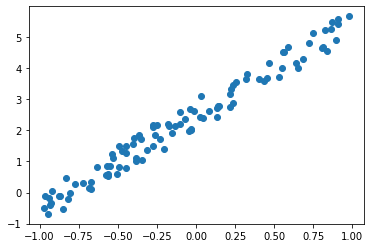

In [16]:
# scatter plot of the line, we need x and y, both same dimension -> 1
# this is why we picked the first columns only, by advanced slicing and subscripting, simplify this?
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
# mse is used for regression problems like this where the dependent variable tensor
# is a contituos one (float) and not like discreet which we saw in teddy bear classification

# why create this fucntion in the first place? well we need to predict a line that for each X, we get Y that looks very similar to
# the aforementioned graph. we predict every single point via just the prediction of the vector tensor 'a' which was initialized
# as (3, 2) in the above case. This time we are only guessing what could it be. For the guessing correction purpose, we need a 
# quantifier that tells us how wrong we are. The most common of these is mean squared error quantifier. refer that for advanced knowledge
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
# mean is a torch function takes a float tensor and returns a mean value 
test = tensor(1.,2,3,4,5); test.mean()

tensor(3.)

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [0]:
# y_hat is the guessed output vector as opposed to the actual y. mse func is used to compare both to get a "how wrong you are" value.
# in this case it is called a "LOSS"
y_hat = x@a
"Loss is -> "+ str(mse(y_hat, y))

'Loss is -> tensor(8.3895)'

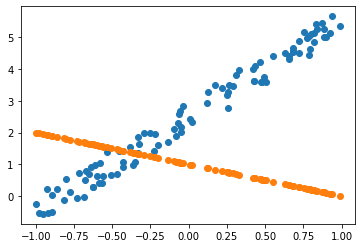

In [0]:
# for the value of a (-1,1) as a guessed slope intercept the line is this. the quantified loss value we saw is 8.3895.
# we are at a lifelong mission of reducing that. THAT IS THE SOLE PURPOSE OF DEEP LEARNING
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression. We just the perfectionization of the the two numbers in the `a` tensor!

IN SHORT HOW DO WE REDUCE THE GIGANTIC LOSS VALUE CALCULATED VIA A LOSS FUNCTION? SIMPLE, USING ANOTHER FUNCTION WHICH HANDLES OPTIMIZATION. WE CALL IT THE OPTIMIZATION FUNCTION AND THE PROCESS WE WOULD USE IS CALLED GRADIENT DESCENT!

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [18]:
# Parameterizes the initially declared a(1,1), why do that? Guessing that it has something to do with the calculation of minimization
# paremeters are special kind of variables that can store additional info it seems. we can access the data portion of it via param.data
a = nn.Parameter(a); a

Parameter containing:
tensor([3., 2.], requires_grad=True)

In [0]:
# didn't understand this
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        # func_ is in-place funcs
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(2.7725, grad_fn=<MeanBackward0>)
tensor(0.1119, grad_fn=<MeanBackward0>)
tensor(0.0813, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)


In [0]:
a = a.detach().numpy(); a

array([3.038188, 2.51014 ], dtype=float32)

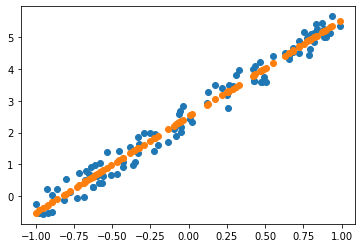

In [0]:
# the a we know is (3., 2) but for the data we deep learned it to be as is, and it is quite good prediction
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))
a_no_grad = a.detach().numpy()

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a_no_grad)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a_no_grad)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.